In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [83]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.debugging.set_log_device_placement(True))

[]
None


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [4]:
data['Embarked'] = data['Embarked'].fillna('S')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

In [8]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [9]:
data['family'] = data['SibSp'] + data['Parch'] + 1

In [10]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2


In [11]:
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [12]:
def age_dist(age):
    if 0 <= age < 10:
        return 'under10s'
    elif 10 <= age < 20:
        return '10s'
    elif 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    elif 60 <= age < 70:
        return '60s'
    elif 70 <= age < 80:
        return '70s'
    elif 80 <= age < 90:
        return '80s'

In [13]:
data['Age'] = data['Age'].apply(age_dist)

In [14]:
data.head(2)

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,20s,S,2
1,1,1,female,30s,C,2


In [15]:
data = pd.get_dummies(data, drop_first=True)
data.head(2)

,Survived,Pclass,family,Sex_male,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under10s,Embarked_Q,Embarked_S
0,0,3,2,1,1,0,0,0,0,0,0,0,0,1
1,1,1,2,0,0,1,0,0,0,0,0,0,0,0


In [17]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [21]:
dtc = DecisionTreeClassifier(max_depth= 3, random_state=7)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print(accuracy_score(y_test, pred_dtc))
print(classification_report(y_test, pred_dtc))

0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 6, n_estimators=1000, criterion="entropy",
                             n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



# tensorflow Sequential API를 사용한 순차적 모델

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [26]:

X_train.shape

(712, 13)

In [43]:
# 딥러닝 신경망 모델 정의
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu' )) #input_dim: 독립변수의 컬럼 수 X :입력층
model.add(Dense(60, activation='relu')) # 은닉층 1
model.add(Dense(30, activation='relu')) # 은닉층 2
model.add(Dense(15, activation='relu')) # 은닉층 3
model.add(Dense(1, activation='sigmoid')) # 출력층 sigmoid: 이진 분류

In [44]:
# 신경망 훈련시 사용할 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                420       
                                                                 
 dense_5 (Dense)             (None, 60)                1860      
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 dense_7 (Dense)             (None, 15)                465       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 4,591
Trainable params: 4,591
Non-trainable params: 0
_________________________________________________________________


In [70]:
history = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/200
18/18 [==============================] - 0s 6ms/step - loss: 0.2873 - accuracy: 0.8694 - val_loss: 1.2406 - val_accuracy: 0.7542
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2739 - accuracy: 0.8778 - val_loss: 1.1133 - val_accuracy: 0.7709
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2696 - accuracy: 0.8736 - val_loss: 1.1311 - val_accuracy: 0.7765
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.8778 - val_loss: 1.1818 - val_accuracy: 0.7542
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.8778 - val_loss: 1.1943 - val_accuracy: 0.7709
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2696 - accuracy: 0.8778 - val_loss: 1.2318 - val_accuracy: 0.7654
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2735 - accuracy: 0.8722 - val_loss: 1.2063 - val_accuracy: 0.7654
Epoch 8/200
1

Epoch 59/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2690 - accuracy: 0.8778 - val_loss: 1.3222 - val_accuracy: 0.7709
Epoch 60/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.8764 - val_loss: 1.3223 - val_accuracy: 0.7654
Epoch 61/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.8792 - val_loss: 1.3041 - val_accuracy: 0.7654
Epoch 62/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2691 - accuracy: 0.8736 - val_loss: 1.2929 - val_accuracy: 0.7598
Epoch 63/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.8708 - val_loss: 1.2532 - val_accuracy: 0.7654
Epoch 64/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2682 - accuracy: 0.8722 - val_loss: 1.2540 - val_accuracy: 0.7654
Epoch 65/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2691 - accuracy: 0.8694 - val_loss: 1.2351 - val_accuracy: 0.7598
Epoch 

18/18 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.8750 - val_loss: 1.3124 - val_accuracy: 0.7654
Epoch 117/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.8792 - val_loss: 1.2885 - val_accuracy: 0.7709
Epoch 118/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.8736 - val_loss: 1.2774 - val_accuracy: 0.7709
Epoch 119/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.8750 - val_loss: 1.2810 - val_accuracy: 0.7542
Epoch 120/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.8764 - val_loss: 1.3290 - val_accuracy: 0.7654
Epoch 121/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2684 - accuracy: 0.8792 - val_loss: 1.3046 - val_accuracy: 0.7654
Epoch 122/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.8736 - val_loss: 1.2522 - val_accuracy: 0.7598
Epoch 123/200

18/18 [==============================] - 0s 4ms/step - loss: 0.2663 - accuracy: 0.8750 - val_loss: 1.3469 - val_accuracy: 0.7654
Epoch 174/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2675 - accuracy: 0.8750 - val_loss: 1.3756 - val_accuracy: 0.7709
Epoch 175/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2716 - accuracy: 0.8708 - val_loss: 1.3276 - val_accuracy: 0.7709
Epoch 176/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2670 - accuracy: 0.8792 - val_loss: 1.3651 - val_accuracy: 0.7654
Epoch 177/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.8750 - val_loss: 1.3158 - val_accuracy: 0.7709
Epoch 178/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2685 - accuracy: 0.8750 - val_loss: 1.3221 - val_accuracy: 0.7765
Epoch 179/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2681 - accuracy: 0.8736 - val_loss: 1.3153 - val_accuracy: 0.7598
Epoch 180/200

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 정확성을 보는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* 두 지표간 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [71]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

6/6 [==============================] - 0s 1ms/step - loss: 1.3501 - accuracy: 0.7709
test loss 1.3500831127166748
test accuracy 0.7709497213363647


In [72]:
history

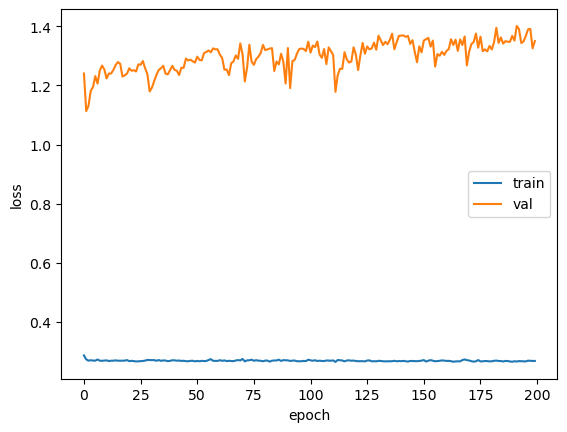

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [74]:
pred = model.predict(X_test)
print(pred.shape)

6/6 [==============================] - 0s 2ms/step
(179, 1)


In [76]:
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x >= 0.5 else 0) 

In [77]:
pred

0      0
1      0
2      0
3      0
4      1
      ..
174    1
175    1
176    0
177    0
178    1
Name: 0, Length: 179, dtype: int64

In [78]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.770949720670391
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       110
           1       0.77      0.58      0.66        69

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.74       179
weighted avg       0.77      0.77      0.76       179



# Tenorflow Functional API를 이용한 함수형 모델
* Sequential API는 단순이 층을 여러 개 쌓는 형태라 복잡한 형태의 모델 생성에 한계가 있음.
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(multi-input), 다중 출력(multi-output)등 복잡한 모델을 정의 할 수 있음.
* Input(shape=(독립변수 수, )) 로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력 정의

In [79]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [80]:
inputs = Input(shape=(X_train.shape[1], )) # 입력층 정의 (컬럼(특성,Feature) 14개를 입력으로 받음)
x = Dense(30, activation='relu')(inputs) # 은닉층 1번
x = Dense(60, activation='relu')(x) # 은닉층 2번
x = Dense(15, activation='relu')(x) # 은닉층 3번
x = Dense(1, activation='sigmoid')(x) # 출력층
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_9 (Dense)             (None, 30)                420       
                                                                 
 dense_10 (Dense)            (None, 60)                1860      
                                                                 
 dense_11 (Dense)            (None, 15)                915       
                                                                 
 dense_12 (Dense)            (None, 1)                 16        
                                                                 
Total params: 3,211
Trainable params: 3,211
Non-trainable params: 0
_________________________________________________________________


Epoch 1/400
8/8 [==============================] - 1s 27ms/step - loss: 0.7368 - accuracy: 0.4719 - val_loss: 0.6554 - val_accuracy: 0.5754
Epoch 2/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6478 - accuracy: 0.6180 - val_loss: 0.6291 - val_accuracy: 0.6145
Epoch 3/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6356 - accuracy: 0.6166 - val_loss: 0.6230 - val_accuracy: 0.6145
Epoch 4/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6222 - accuracy: 0.6166 - val_loss: 0.6133 - val_accuracy: 0.6145
Epoch 5/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6050 - accuracy: 0.6264 - val_loss: 0.6043 - val_accuracy: 0.6369
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5888 - accuracy: 0.6643 - val_loss: 0.5963 - val_accuracy: 0.6592
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5726 - accuracy: 0.6798 - val_loss: 0.5908 - val_accuracy: 0.7039
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 6ms/step - loss: 0.3735 - accuracy: 0.8497 - val_loss: 0.5071 - val_accuracy: 0.7654
Epoch 60/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3721 - accuracy: 0.8497 - val_loss: 0.5094 - val_accuracy: 0.7654
Epoch 61/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3699 - accuracy: 0.8455 - val_loss: 0.5147 - val_accuracy: 0.7821
Epoch 62/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3702 - accuracy: 0.8497 - val_loss: 0.5211 - val_accuracy: 0.7654
Epoch 63/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3694 - accuracy: 0.8483 - val_loss: 0.5269 - val_accuracy: 0.7486
Epoch 64/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3706 - accuracy: 0.8469 - val_loss: 0.5212 - val_accuracy: 0.7765
Epoch 65/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3785 - accuracy: 0.8441 - val_loss: 0.5133 - val_accuracy: 0.7933
Epoch 66/400
8/8 [===============

8/8 [==============================] - 0s 5ms/step - loss: 0.3380 - accuracy: 0.8652 - val_loss: 0.5360 - val_accuracy: 0.7709
Epoch 118/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3381 - accuracy: 0.8567 - val_loss: 0.5400 - val_accuracy: 0.7709
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3463 - accuracy: 0.8610 - val_loss: 0.5404 - val_accuracy: 0.7933
Epoch 120/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3507 - accuracy: 0.8497 - val_loss: 0.5321 - val_accuracy: 0.7765
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3371 - accuracy: 0.8652 - val_loss: 0.5328 - val_accuracy: 0.7877
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3347 - accuracy: 0.8567 - val_loss: 0.5362 - val_accuracy: 0.7765
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3340 - accuracy: 0.8624 - val_loss: 0.5393 - val_accuracy: 0.7709
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3192 - accuracy: 0.8680 - val_loss: 0.5821 - val_accuracy: 0.7598
Epoch 176/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3200 - accuracy: 0.8638 - val_loss: 0.5725 - val_accuracy: 0.7542
Epoch 177/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3224 - accuracy: 0.8596 - val_loss: 0.5835 - val_accuracy: 0.7709
Epoch 178/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3196 - accuracy: 0.8624 - val_loss: 0.5836 - val_accuracy: 0.7709
Epoch 179/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3195 - accuracy: 0.8666 - val_loss: 0.5783 - val_accuracy: 0.7654
Epoch 180/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3163 - accuracy: 0.8652 - val_loss: 0.5851 - val_accuracy: 0.7709
Epoch 181/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3167 - accuracy: 0.8624 - val_loss: 0.5867 - val_accuracy: 0.7598
Epoch 182/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3082 - accuracy: 0.8596 - val_loss: 0.6050 - val_accuracy: 0.7598
Epoch 234/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3078 - accuracy: 0.8638 - val_loss: 0.6189 - val_accuracy: 0.7598
Epoch 235/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3051 - accuracy: 0.8638 - val_loss: 0.6267 - val_accuracy: 0.7598
Epoch 236/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.8610 - val_loss: 0.6137 - val_accuracy: 0.7598
Epoch 237/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3046 - accuracy: 0.8638 - val_loss: 0.6334 - val_accuracy: 0.7598
Epoch 238/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.8638 - val_loss: 0.5923 - val_accuracy: 0.7709
Epoch 239/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3279 - accuracy: 0.8624 - val_loss: 0.5892 - val_accuracy: 0.7709
Epoch 240/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.8652 - val_loss: 0.6595 - val_accuracy: 0.7765
Epoch 292/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3048 - accuracy: 0.8750 - val_loss: 0.6464 - val_accuracy: 0.7654
Epoch 293/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2998 - accuracy: 0.8722 - val_loss: 0.6326 - val_accuracy: 0.7765
Epoch 294/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2987 - accuracy: 0.8680 - val_loss: 0.6538 - val_accuracy: 0.7709
Epoch 295/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8694 - val_loss: 0.6339 - val_accuracy: 0.7598
Epoch 296/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3023 - accuracy: 0.8680 - val_loss: 0.6361 - val_accuracy: 0.7765
Epoch 297/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.8652 - val_loss: 0.6679 - val_accuracy: 0.7765
Epoch 298/400
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.2940 - accuracy: 0.8708 - val_loss: 0.6699 - val_accuracy: 0.7765
Epoch 350/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3000 - accuracy: 0.8680 - val_loss: 0.6801 - val_accuracy: 0.7821
Epoch 351/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.8680 - val_loss: 0.6683 - val_accuracy: 0.7709
Epoch 352/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2949 - accuracy: 0.8722 - val_loss: 0.6641 - val_accuracy: 0.7598
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2995 - accuracy: 0.8666 - val_loss: 0.6574 - val_accuracy: 0.7598
Epoch 354/400
8/8 [==============================] - 0s 6ms/step - loss: 0.2961 - accuracy: 0.8764 - val_loss: 0.6603 - val_accuracy: 0.7709
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2947 - accuracy: 0.8750 - val_loss: 0.6647 - val_accuracy: 0.7709
Epoch 356/400
8/8 [========

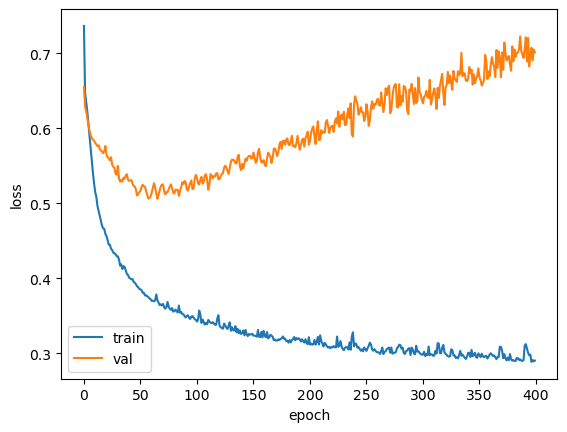

In [81]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs= 400, batch_size= 100, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print('test_loss:', score[0])
print('test_accuracy:', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Model Subclassing API로 모델 만들기
* class 형태의 모델 정의 방법
* tf.keras.Model을 상속받아 작성한다.

In [84]:
class Titanic(tf.keras.Model):
    
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation="relu")
        self.dense2 = tf.keras.layers.Dense(60, activation="relu")
        self.dense3 = tf.keras.layers.Dense(15, activation="relu")
        self.classifier = tf.keras.layers.Dense(1, activation="sigmoid")
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [86]:
model = Titanic()  # Titanic 클래스 사용

Epoch 1/400
8/8 [==============================] - 1s 27ms/step - loss: 0.6927 - accuracy: 0.5393 - val_loss: 0.6663 - val_accuracy: 0.6257
Epoch 2/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6433 - accuracy: 0.6334 - val_loss: 0.6393 - val_accuracy: 0.6145
Epoch 3/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6205 - accuracy: 0.6180 - val_loss: 0.6236 - val_accuracy: 0.6145
Epoch 4/400
8/8 [==============================] - 0s 6ms/step - loss: 0.6039 - accuracy: 0.6180 - val_loss: 0.6174 - val_accuracy: 0.6089
Epoch 5/400
8/8 [==============================] - 0s 8ms/step - loss: 0.5899 - accuracy: 0.6208 - val_loss: 0.6098 - val_accuracy: 0.6201
Epoch 6/400
8/8 [==============================] - 0s 6ms/step - loss: 0.5754 - accuracy: 0.6531 - val_loss: 0.6045 - val_accuracy: 0.6648
Epoch 7/400
8/8 [==============================] - 0s 6ms/step - loss: 0.5620 - accuracy: 0.6938 - val_loss: 0.5986 - val_accuracy: 0.6760
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.3509 - accuracy: 0.8525 - val_loss: 0.5214 - val_accuracy: 0.8101
Epoch 60/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3498 - accuracy: 0.8483 - val_loss: 0.5189 - val_accuracy: 0.7821
Epoch 61/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3515 - accuracy: 0.8567 - val_loss: 0.5294 - val_accuracy: 0.8101
Epoch 62/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3502 - accuracy: 0.8553 - val_loss: 0.5335 - val_accuracy: 0.7821
Epoch 63/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3510 - accuracy: 0.8553 - val_loss: 0.5349 - val_accuracy: 0.7765
Epoch 64/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3501 - accuracy: 0.8539 - val_loss: 0.5331 - val_accuracy: 0.8045
Epoch 65/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3465 - accuracy: 0.8567 - val_loss: 0.5320 - val_accuracy: 0.7821
Epoch 66/400
8/8 [===============

8/8 [==============================] - 0s 5ms/step - loss: 0.3228 - accuracy: 0.8680 - val_loss: 0.5712 - val_accuracy: 0.7821
Epoch 118/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3236 - accuracy: 0.8666 - val_loss: 0.5691 - val_accuracy: 0.7821
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3228 - accuracy: 0.8666 - val_loss: 0.5769 - val_accuracy: 0.7989
Epoch 120/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3233 - accuracy: 0.8666 - val_loss: 0.5768 - val_accuracy: 0.7933
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3225 - accuracy: 0.8680 - val_loss: 0.5759 - val_accuracy: 0.8101
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3231 - accuracy: 0.8610 - val_loss: 0.5787 - val_accuracy: 0.8156
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3198 - accuracy: 0.8694 - val_loss: 0.5809 - val_accuracy: 0.7821
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3117 - accuracy: 0.8736 - val_loss: 0.6237 - val_accuracy: 0.7542
Epoch 176/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.8652 - val_loss: 0.6140 - val_accuracy: 0.7765
Epoch 177/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.8708 - val_loss: 0.6101 - val_accuracy: 0.7765
Epoch 178/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3093 - accuracy: 0.8708 - val_loss: 0.6215 - val_accuracy: 0.7765
Epoch 179/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.8680 - val_loss: 0.6300 - val_accuracy: 0.7877
Epoch 180/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3092 - accuracy: 0.8694 - val_loss: 0.6295 - val_accuracy: 0.7765
Epoch 181/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3091 - accuracy: 0.8694 - val_loss: 0.6203 - val_accuracy: 0.7709
Epoch 182/400
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.3049 - accuracy: 0.8694 - val_loss: 0.6498 - val_accuracy: 0.7709
Epoch 234/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3011 - accuracy: 0.8680 - val_loss: 0.6597 - val_accuracy: 0.7765
Epoch 235/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.8680 - val_loss: 0.6566 - val_accuracy: 0.7877
Epoch 236/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3031 - accuracy: 0.8666 - val_loss: 0.6549 - val_accuracy: 0.7709
Epoch 237/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.8638 - val_loss: 0.6646 - val_accuracy: 0.7765
Epoch 238/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.8708 - val_loss: 0.6533 - val_accuracy: 0.7598
Epoch 239/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3004 - accuracy: 0.8694 - val_loss: 0.6467 - val_accuracy: 0.7877
Epoch 240/400
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.3016 - accuracy: 0.8708 - val_loss: 0.6696 - val_accuracy: 0.7709
Epoch 292/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3011 - accuracy: 0.8652 - val_loss: 0.6810 - val_accuracy: 0.7654
Epoch 293/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2985 - accuracy: 0.8764 - val_loss: 0.6855 - val_accuracy: 0.7877
Epoch 294/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2954 - accuracy: 0.8652 - val_loss: 0.6926 - val_accuracy: 0.7654
Epoch 295/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8638 - val_loss: 0.7005 - val_accuracy: 0.7821
Epoch 296/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3007 - accuracy: 0.8694 - val_loss: 0.6969 - val_accuracy: 0.7709
Epoch 297/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3052 - accuracy: 0.8680 - val_loss: 0.6888 - val_accuracy: 0.7542
Epoch 298/400
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.2937 - accuracy: 0.8652 - val_loss: 0.7090 - val_accuracy: 0.7765
Epoch 350/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2938 - accuracy: 0.8750 - val_loss: 0.7063 - val_accuracy: 0.7709
Epoch 351/400
8/8 [==============================] - 0s 6ms/step - loss: 0.2891 - accuracy: 0.8736 - val_loss: 0.7029 - val_accuracy: 0.7654
Epoch 352/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.8680 - val_loss: 0.6977 - val_accuracy: 0.7654
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2991 - accuracy: 0.8722 - val_loss: 0.6945 - val_accuracy: 0.7598
Epoch 354/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3005 - accuracy: 0.8736 - val_loss: 0.7102 - val_accuracy: 0.7709
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.8680 - val_loss: 0.7224 - val_accuracy: 0.7598
Epoch 356/400
8/8 [========

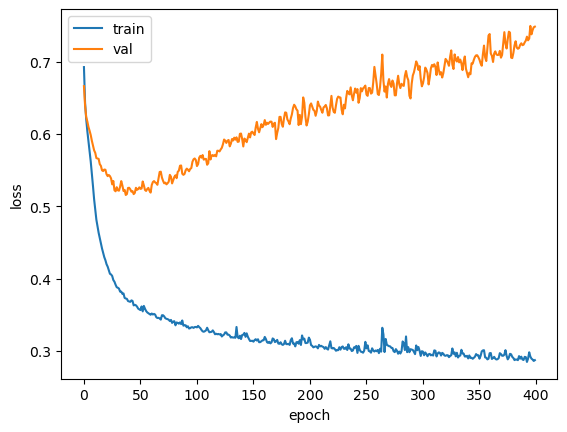

In [87]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs= 400, batch_size= 100, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print('test_loss:', score[0])
print('test_accuracy:', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()